In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/NYPD_Arrest_Data__Year_to_Date_.csv'
df = pd.read_csv(file_path)

Display top rows of the dataset.

In [ ]:
df.head() # first 5 rows

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,279884335,01-03-2024,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,45-64,M,BLACK,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
1,279876234,01-03-2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,101,0,25-44,M,BLACK,1053648,158969,40.602740,-73.750081,POINT (-73.750081 40.60274)
2,279939192,01-04-2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,K,83,0,45-64,M,BLACK,1007127,193705,40.698323,-73.917495,POINT (-73.917495 40.698323)
3,280561026,01/15/2024,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,121,0,18-24,M,BLACK,942827,166373,40.623238,-74.149217,POINT (-74.149217 40.623238)
4,280084387,01-07-2024,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F,Q,107,0,45-64,M,BLACK,1036732,206997,40.734681,-73.810626,POINT (-73.810626 40.734681)


Display bottom rows of the dataset.

In [ ]:
df.tail() # last 5 rows

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
128773,288539851,06/14/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,S,120,0,25-44,M,WHITE HISPANIC,961273,166477,40.623588,-74.082771,POINT (-74.08277059164357 40.62358756462782)
128774,288770364,06/19/2024,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510D,F,S,122,0,45-64,M,WHITE HISPANIC,960514,151754,40.583176,-74.085450,POINT (-74.08545 40.583176)
128775,288845960,06/20/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,M,9,2,45-64,M,BLACK HISPANIC,990284,201838,40.720673,-73.978232,POINT (-73.97823191814932 40.72067330872773)
128776,288345759,06-11-2024,510.0,"CONTROLLED SUBSTANCE, INTENT T",117.0,DANGEROUS DRUGS,PL 2200601,F,Q,103,0,25-44,M,ASIAN / PACIFIC ISLANDER,1038891,192114,40.693817,-73.802958,POINT (-73.80295796488015 40.69381660456438)
128777,288578223,06/15/2024,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 265031B,F,B,47,2,18-24,M,BLACK,1024133,262519,40.887139,-73.855758,POINT (-73.855758 40.887139)


Data Preprocessing.

In [ ]:
df.shape # number of rows and columns

(128778, 19)

In [ ]:
df.info # concise summary

<bound method DataFrame.info of         ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0        279884335  01-03-2024  153.0                          RAPE 3  104.0   
1        279876234  01-03-2024  105.0               STRANGULATION 1ST  106.0   
2        279939192  01-04-2024  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   
3        280561026  01/15/2024  203.0            TRESPASS 3, CRIMINAL  352.0   
4        280084387  01-07-2024  223.0        BURGLARY,RESIDENCE,NIGHT  107.0   
...            ...         ...    ...                             ...    ...   
128773   288539851  06/14/2024  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
128774   288770364  06/19/2024  779.0  PUBLIC ADMINISTRATION,UNCLASSI  126.0   
128775   288845960  06/20/2024  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
128776   288345759  06-11-2024  510.0  CONTROLLED SUBSTANCE, INTENT T  117.0   
128777   288578223  06/15/2024  792.0      CRIMINAL POSSESSION WEAPON  118.0   

                      OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                          RAPE  PL 1302503          F           K   
1                FELONY ASSAULT  PL 1211200          F           Q   
2                FELONY ASSAULT  PL 1201001          F           K   
3             CRIMINAL TRESPASS  PL 140100A          M           S   
4                      BURGLARY  PL 1403002          F           Q   
...                         ...         ...        ...         ...   
128773          DANGEROUS DRUGS  PL 2200300          M           S   
128774  MISCELLANEOUS PENAL LAW  PL 215510D          F           S   
128775          DANGEROUS DRUGS  PL 2200300          M           M   
128776          DANGEROUS DRUGS  PL 2200601          F           Q   
128777        DANGEROUS WEAPONS  PL 265031B          F           B   

        ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX  \
0                    77                  0     45-64        M   
1                   101                  0     25-44        M   
2                    83                  0     45-64        M   
3                   121                  0     18-24        M   
4                   107                  0     45-64        M   
...                 ...                ...       ...      ...   
128773              120                  0     25-44        M   
128774              122                  0     45-64        M   
128775                9                  2     45-64        M   
128776              103                  0     25-44        M   
128777               47                  2     18-24        M   

                       PERP_RACE  X_COORD_CD  Y_COORD_CD   Latitude  \
0                          BLACK     1003509      185018  40.674496   
1                          BLACK     1053648      158969  40.602740   
2                          BLACK     1007127      193705  40.698323   
3                          BLACK      942827      166373  40.623238   
4                          BLACK     1036732      206997  40.734681   
...                          ...         ...         ...        ...   
128773            WHITE HISPANIC      961273      166477  40.623588   
128774            WHITE HISPANIC      960514      151754  40.583176   
128775            BLACK HISPANIC      990284      201838  40.720673   
128776  ASIAN / PACIFIC ISLANDER     1038891      192114  40.693817   
128777                     BLACK     1024133      262519  40.887139   

        Longitude                      New Georeferenced Column  
0      -73.930571    POINT (-73.9305713255961 40.6744956865259)  
1      -73.750081                   POINT (-73.750081 40.60274)  
2      -73.917495                  POINT (-73.917495 40.698323)  
3      -74.149217                  POINT (-74.149217 40.623238)  
4      -73.810626                  POINT (-73.810626 40.734681)  
...           ...                                           ...  
128773 -74.082771  POINT (-74.08277059164357 40.62358756462782)  
1287

In [ ]:
df.describe().T # statistical summary(count, mean, stand. dev., quartile range)

,count,mean,std,min,25%,50%,75%,max
ARREST_KEY,128778.0,2.846440e+08,2.762491e+06,2.797635e+08,2.822672e+08,2.846585e+08,2.870588e+08,2.893894e+08
PD_CD,128774.0,4.329508e+02,2.730616e+02,2.000000e+00,1.170000e+02,3.970000e+02,7.050000e+02,9.970000e+02
KY_CD,128763.0,2.530570e+02,1.474496e+02,1.010000e+02,1.130000e+02,3.400000e+02,3.440000e+02,9.950000e+02
ARREST_PRECINCT,128778.0,6.360030e+01,3.501022e+01,1.000000e+00,4.000000e+01,6.300000e+01,1.020000e+02,1.230000e+02
JURISDICTION_CODE,128778.0,9.365497e-01,7.066461e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.700000e+01
X_COORD_CD,128778.0,1.005497e+06,2.171047e+04,0.000000e+00,9.905130e+05,1.005166e+06,1.017933e+06,1.067185e+06
Y_COORD_CD,128778.0,2.076262e+05,2.948981e+04,0.000000e+00,1.857100e+05,2.067800e+05,2.351708e+05,2.712820e+05
Latitude,128778.0,4.073589e+01,1.797762e-01,0.000000e+00,4.067636e+01,4.073420e+01,4.081213e+01,4.091124e+01
Longitude,128778.0,-7.392210e+01,3.013224e-01,-7.425271e+01,-7.397739e+01,-7.392447e+01,-7.387833e+01,0.000000e+00


In [ ]:
df.isnull().any() # checking null values

,0
ARREST_KEY,False
ARREST_DATE,False
PD_CD,True
PD_DESC,False
KY_CD,True
OFNS_DESC,False
LAW_CODE,False
LAW_CAT_CD,True
ARREST_BORO,False
ARREST_PRECINCT,False


In [ ]:
df.isnull().sum()  # count of null values

,0
ARREST_KEY,0
ARREST_DATE,0
PD_CD,4
PD_DESC,0
KY_CD,15
OFNS_DESC,0
LAW_CODE,0
LAW_CAT_CD,770
ARREST_BORO,0
ARREST_PRECINCT,0


In [ ]:
df.isnull().sum()/df.shape[0]*100 # percentage of missing values

,0
ARREST_KEY,0.000000
ARREST_DATE,0.000000
PD_CD,0.003106
PD_DESC,0.000000
KY_CD,0.011648
OFNS_DESC,0.000000
LAW_CODE,0.000000
LAW_CAT_CD,0.597928
ARREST_BORO,0.000000
ARREST_PRECINCT,0.000000


In [ ]:
df_zero = df.fillna(0)
print(df_zero)   # replacing null values with zero

        ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0        279884335  01/03/2024  153.0                          RAPE 3  104.0   
1        279876234  01/03/2024  105.0               STRANGULATION 1ST  106.0   
2        279939192  01/04/2024  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   
3        280561026  01/15/2024  203.0            TRESPASS 3, CRIMINAL  352.0   
4        280084387  01/07/2024  223.0        BURGLARY,RESIDENCE,NIGHT  107.0   
...            ...         ...    ...                             ...    ...   
128773   288539851  06/14/2024  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
128774   288770364  06/19/2024  779.0  PUBLIC ADMINISTRATION,UNCLASSI  126.0   
128775   288845960  06/20/2024  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
128776   288345759  06/11/2024  510.0  CONTROLLED SUBSTANCE, INTENT T  117.0   
128777   288578223  06/15/2024  792.0      CRIMINAL POSSESSION WEAPON  118.0   

                      OFNS_DESC    LAW_

In [ ]:
df.duplicated().sum() # count of duplicated data

0

In [ ]:
for i in df.columns:
  print(i,df[i].nunique())   # count of different categories of data

ARREST_KEY 128778
ARREST_DATE 182
PD_CD 253
PD_DESC 243
KY_CD 69
OFNS_DESC 66
LAW_CODE 945
LAW_CAT_CD 6
ARREST_BORO 5
ARREST_PRECINCT 77
JURISDICTION_CODE 25
AGE_GROUP 5
PERP_SEX 2
PERP_RACE 7
X_COORD_CD 23148
Y_COORD_CD 24378
Latitude 27205
Longitude 27191
New Georeferenced Column 27746


Removing Outliers.

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Clear Dataset.

In [ ]:
df.info() # overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128778 entries, 0 to 128777
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                128778 non-null  int64  
 1   ARREST_DATE               128778 non-null  object 
 2   PD_CD                     128774 non-null  float64
 3   PD_DESC                   128778 non-null  object 
 4   KY_CD                     128763 non-null  float64
 5   OFNS_DESC                 128778 non-null  object 
 6   LAW_CODE                  128778 non-null  object 
 7   LAW_CAT_CD                128008 non-null  object 
 8   ARREST_BORO               128778 non-null  object 
 9   ARREST_PRECINCT           128778 non-null  int64  
 10  JURISDICTION_CODE         128778 non-null  int64  
 11  AGE_GROUP                 128778 non-null  object 
 12  PERP_SEX                  128778 non-null  object 
 13  PERP_RACE                 128778 non-null  o

Basic Statistical Analysis:

In [ ]:
summary_stats = df.describe()
summary_stats  # statistical overview

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.287780e+05,128774.000000,128763.000000,128778.000000,128778.000000,1.287780e+05,128778.000000,128778.000000,128778.000000
mean,2.846440e+08,432.950782,253.056996,63.600304,0.936550,1.005497e+06,207626.160253,40.735888,-73.922101
std,2.762491e+06,273.061622,147.449578,35.010222,7.066461,2.171047e+04,29489.807544,0.179776,0.301322
min,2.797635e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.252711
25%,2.822672e+08,117.000000,113.000000,40.000000,0.000000,9.905130e+05,185710.000000,40.676357,-73.977392
50%,2.846585e+08,397.000000,340.000000,63.000000,0.000000,1.005166e+06,206780.000000,40.734200,-73.924470
75%,2.870588e+08,705.000000,344.000000,102.000000,0.000000,1.017933e+06,235170.750000,40.812126,-73.878333
max,2.893894e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271282.000000,40.911236,0.000000


Data Visualization:

In [ ]:
plt.figure(figsize=(275, 50))
sns.histplot(df['OFNS_DESC'], kde='True', bins=30)
plt.title('Crime Frequency')
plt.xlabel('Crime')
plt.ylabel('Frequency')
plt.show()

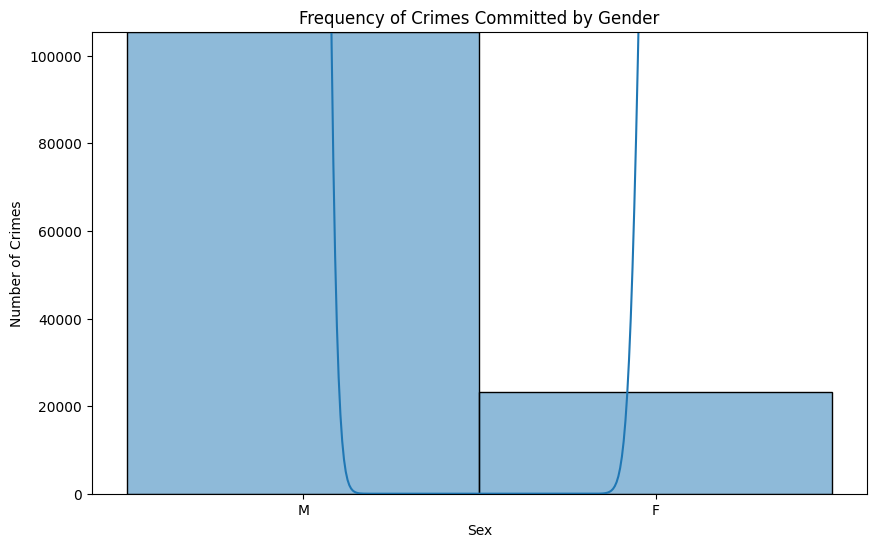

In [ ]:
crime_counts = df['PERP_SEX'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(df['PERP_SEX'], kde=True, bins=30)
plt.title('Frequency of Crimes Committed by Gender')
plt.xlabel('Sex')
plt.ylabel('Number of Crimes')
plt.ylim(0, crime_counts.max() + 5)
plt.show()

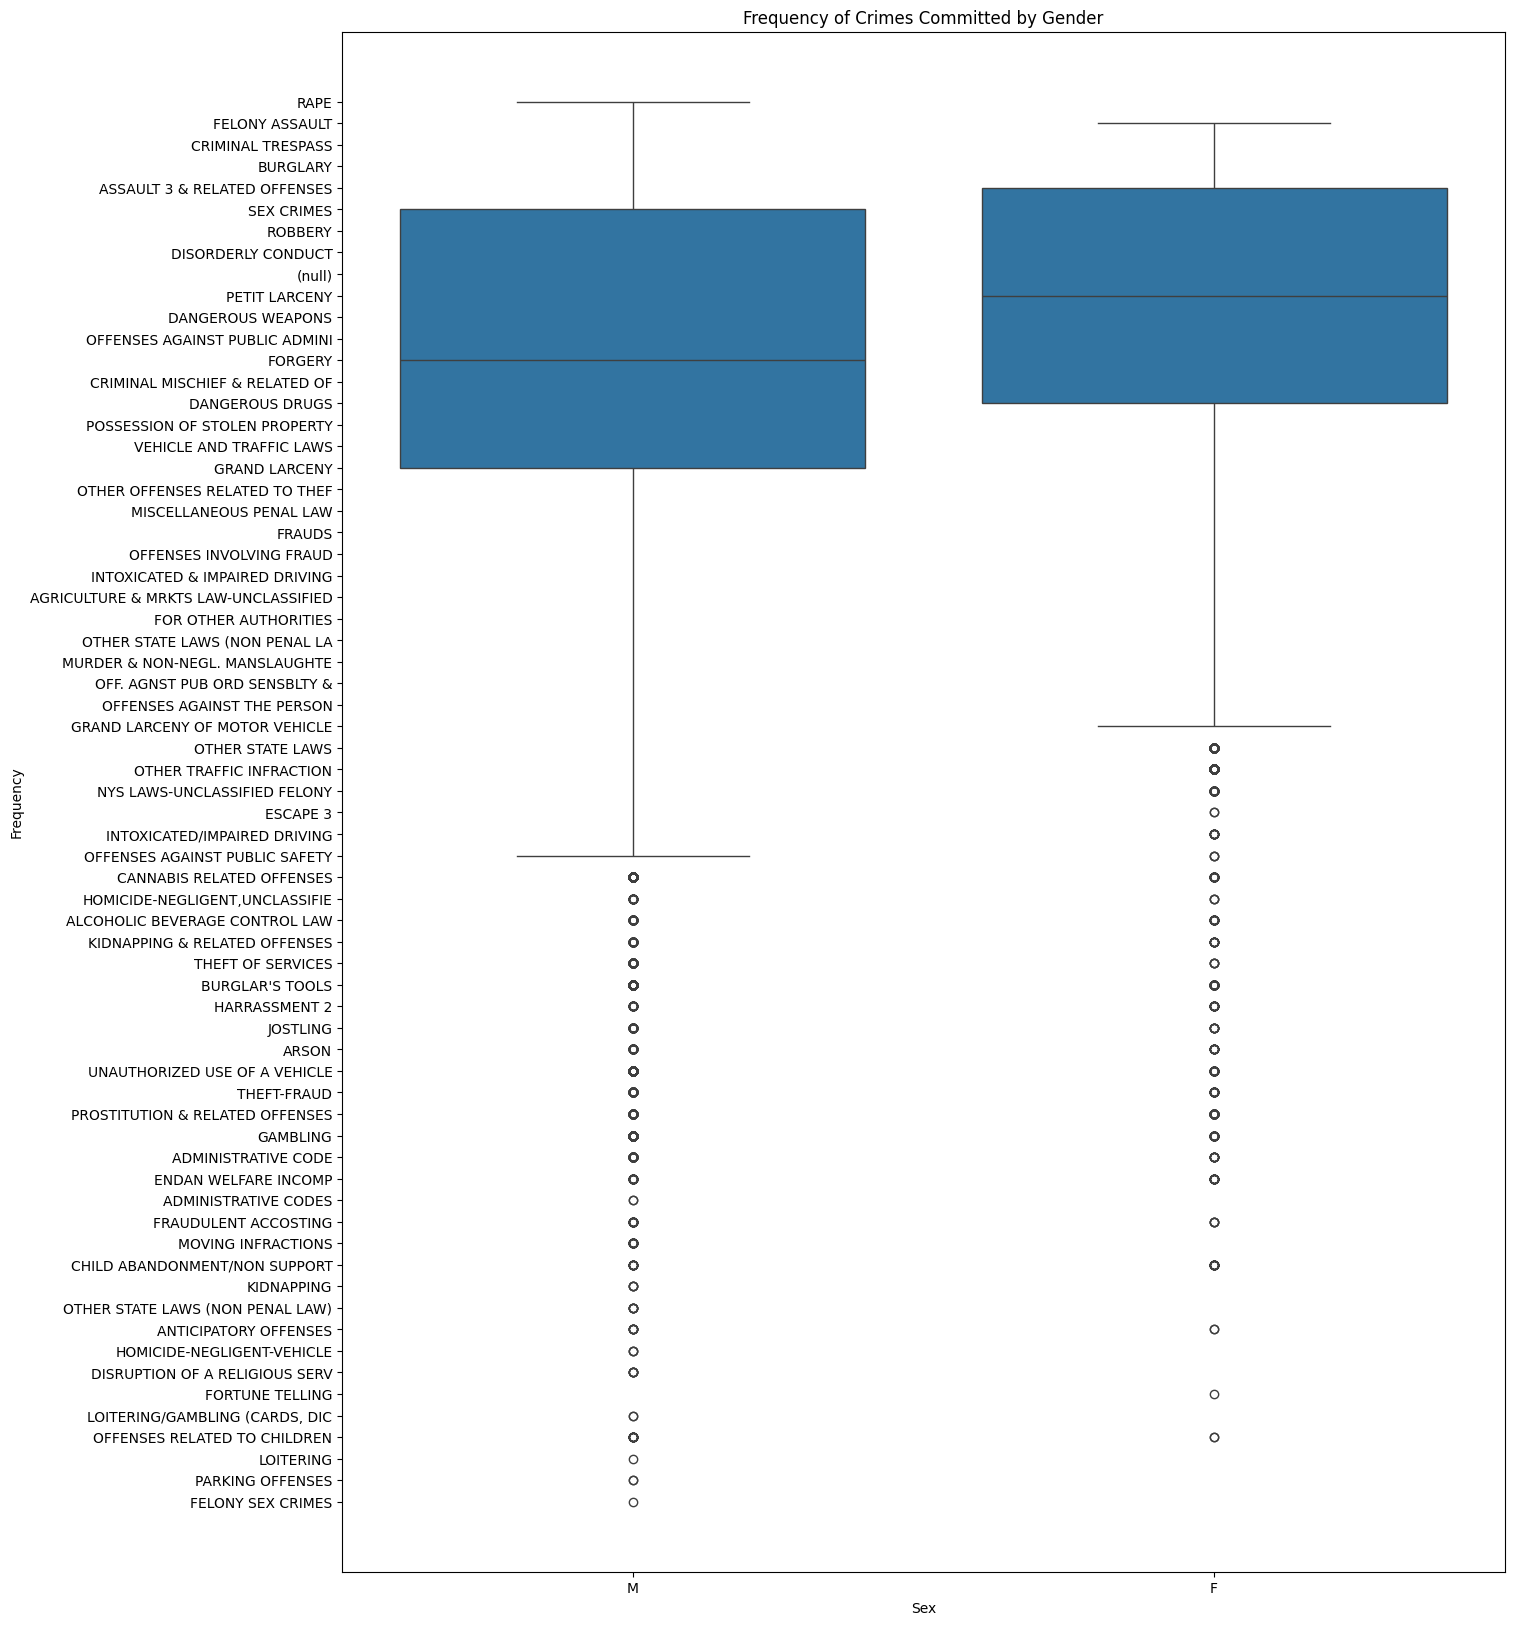

In [ ]:
crime_counts = df['PERP_SEX'].value_counts()

plt.figure(figsize=(15, 20))
sns.boxplot(x='PERP_SEX', y='OFNS_DESC', data=df)
plt.title('Frequency of Crimes Committed by Gender')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

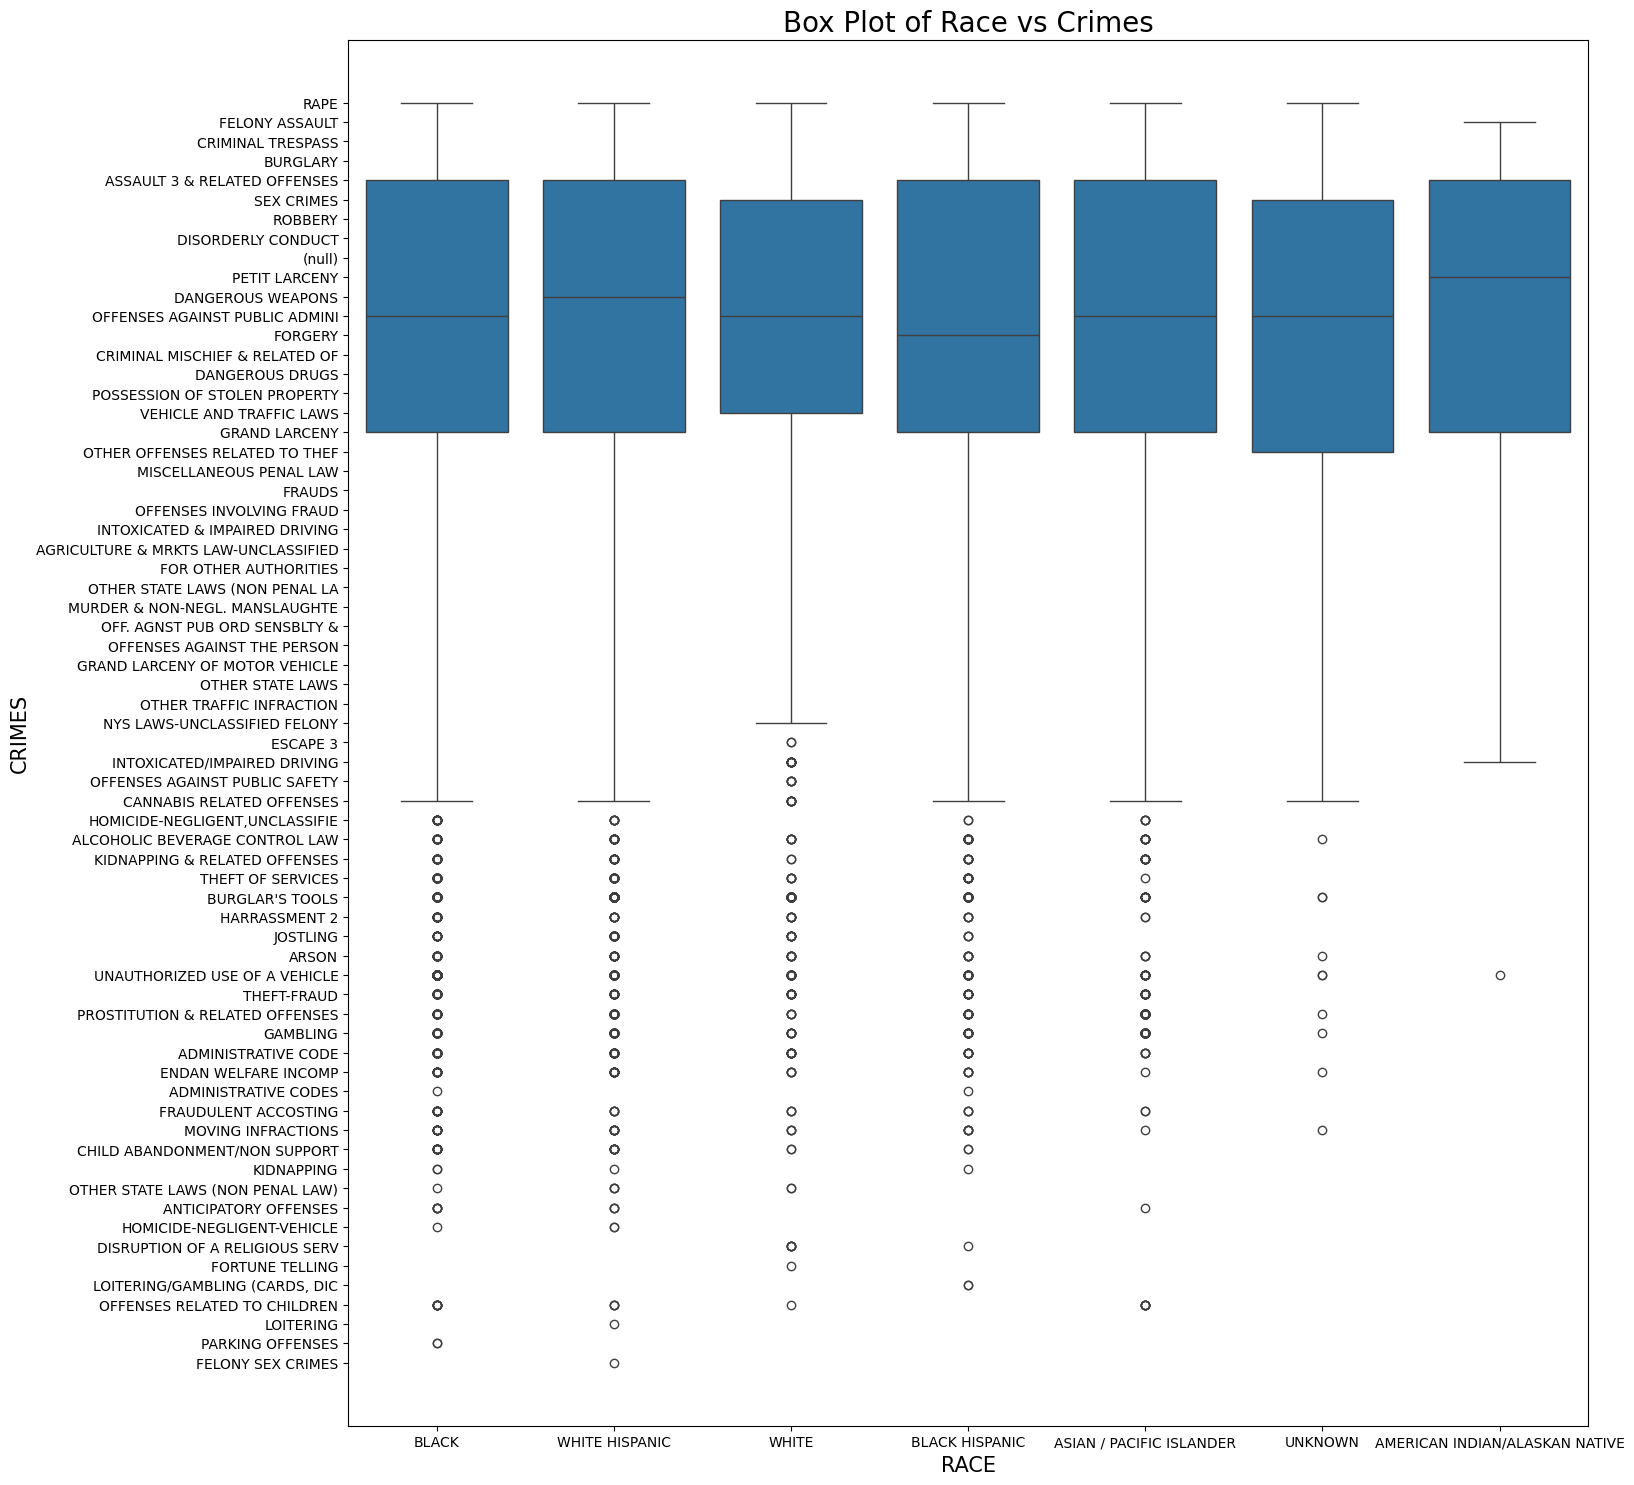

In [ ]:
crime_counts = df['PERP_RACE'].value_counts()

plt.figure(figsize=(16, 18))
sns.boxplot(x='PERP_RACE', y='OFNS_DESC', data=df)
plt.title('Box Plot of Race vs Crimes', fontsize=20)
plt.xlabel('RACE', fontsize=15)
plt.ylabel('CRIMES', fontsize=15)
plt.show()

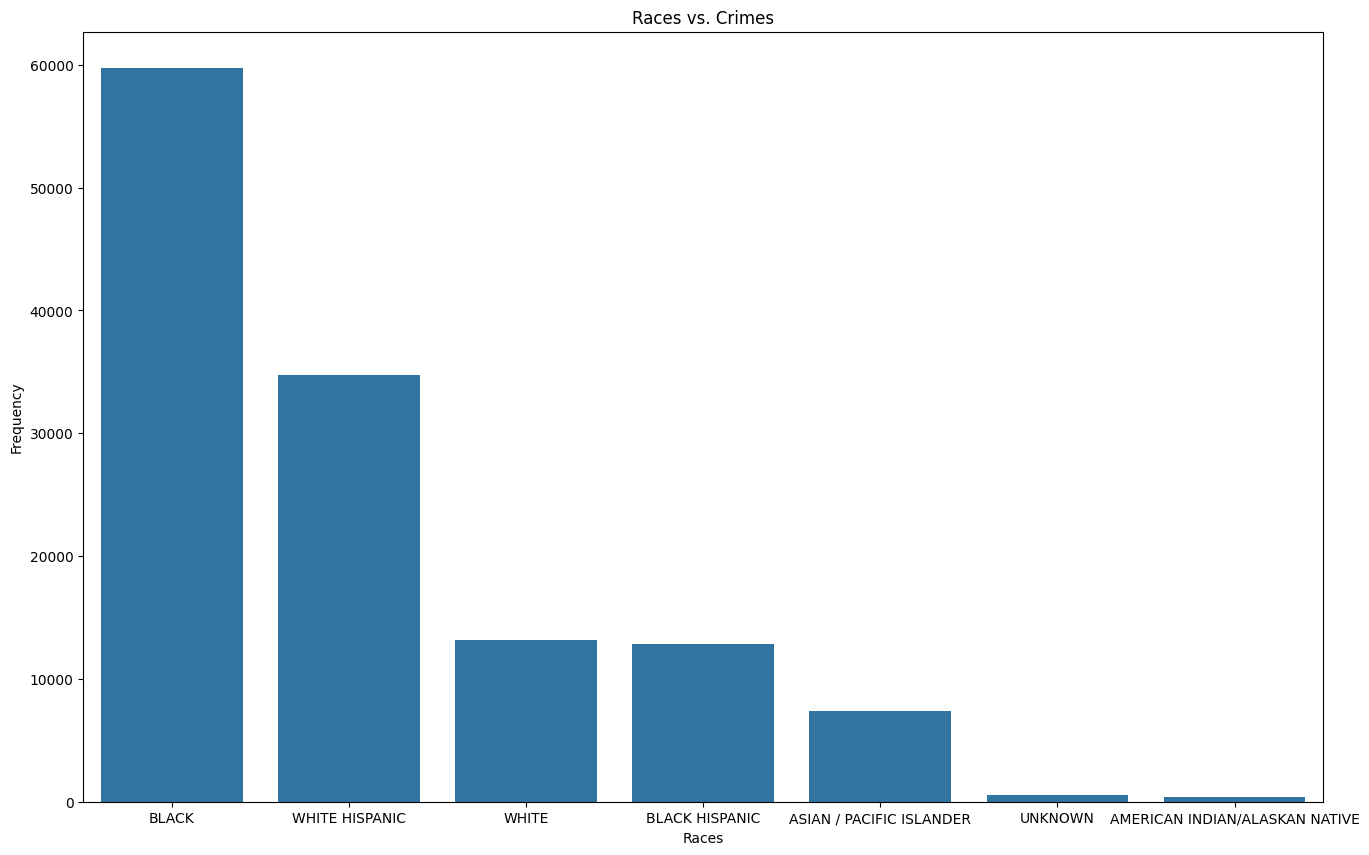

In [ ]:
plt.figure(figsize=(16, 10))
sns.countplot(x='PERP_RACE', data=df)
plt.title('Races vs. Crimes')
plt.xlabel('Races')
plt.ylabel('Frequency')
plt.show()